# ENSF 611 Final Project

Instructor: Dr. L. Dawson

Cory Wu <br>
Rick Zhang <br>

We will use the rentfaster.csv dataset to predict the price of a rental property.

Dataset source: https://www.kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024?resource=download

In [1]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

### Load the data

In [2]:
# Reading dataset and save to df
df = pd.read_csv('../data/rentfaster.csv', header=0)
df.head()


,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [3]:
# show all columns names
df.columns


Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

In [4]:
# check data type
df.info()
# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [5]:
# drop rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      19337 non-null  int64  
 1   city               19337 non-null  object 
 2   province           19337 non-null  object 
 3   address            19337 non-null  object 
 4   latitude           19337 non-null  float64
 5   longitude          19337 non-null  float64
 6   lease_term         19337 non-null  object 
 7   type               19337 non-null  object 
 8   price              19337 non-null  float64
 9   beds               19337 non-null  object 
 10  baths              19337 non-null  object 
 11  sq_feet            19337 non-null  object 
 12  link               19337 non-null  object 
 13  furnishing         19337 non-null  object 
 14  availability_date  19337 non-null  object 
 15  smoking            19337 non-null  object 
 16  cats               19337 no

In [6]:

# drop uninformative columns
df=df.drop(columns=['rentfaster_id', 'address', 'sq_feet', 'link', 'availability_date'])
df.head()

,city,province,latitude,longitude,lease_term,type,price,beds,baths,furnishing,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,Unfurnished,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,Unfurnished,Non-Smoking,True,True
2,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,Unfurnished,Non-Smoking,True,True
3,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,Unfurnished,Non-Smoking,True,True
4,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,Unfurnished,Non-Smoking,True,True


In [7]:
# Create Column Transformer using an encoder and StandardScaler 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['latitude',
                                     'longitude'
                                     ]),
     ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['city',
                                                                            'province',
                                                                            'lease_term', 
                                                                            'type',
                                                                            'beds',
                                                                            'baths',
                                                                            'furnishing',
                                                                            'smoking',
                                                                            'cats',
                                                                            'dogs'])])


In [8]:
# split data into features and target
X = df.drop(columns=['price'])
y = df['price']

In [9]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)



In [10]:
y_test.info()


<class 'pandas.core.series.Series'>
Index: 1934 entries, 19322 to 17564
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1934 non-null   float64
dtypes: float64(1)
memory usage: 30.2 KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, 19322 to 17564
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        1934 non-null   object 
 1   province    1934 non-null   object 
 2   latitude    1934 non-null   float64
 3   longitude   1934 non-null   float64
 4   lease_term  1934 non-null   object 
 5   type        1934 non-null   object 
 6   beds        1934 non-null   object 
 7   baths       1934 non-null   object 
 8   furnishing  1934 non-null   object 
 9   smoking     1934 non-null   object 
 10  cats        1934 non-null   object 
 11  dogs        1934 non-null   object 
dtypes: float64(2), object(10)
memory usage: 196.4+ KB


### Implement Machine Learning Models

In [12]:
# Create a list to store the results
results_list = []


#### 1. Linear Regression

We starts to use hyperparameter tuning from the 2nd half of Random Forest Regression part. We skipped it for linear regression beacuse it's less likely to work well.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
# import r2_score
from sklearn.metrics import r2_score

# The linear model gave negative predictions, which is not possible for prices. Added a function to force the predictions to be non-negative.
def force_positive(y):
    return np.maximum(y, 0)  # Clips negative values to 0

pipe = make_pipeline(
    ct, 
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=force_positive,
        check_inverse=False
    )
)


pipe = make_pipeline(ct, LinearRegression())
pipe.fit(X_train, y_train)
y_pred = np.maximum(pipe.predict(X_test), 0)  # Clips negative values to 0

# calculate R2 score
print(r2_score(y_test, y_pred))

# Add the result to the dataframe
results_list.append({'Model': 'Linear Regression (Non-negative)',
                     'Validation Score': 'NA',
                       'R2 Score': r2_score(y_test, y_pred)})


0.601338377319686


The performance of the linear regression model is very bad.There is no point to do cross validation and hyperparameter tunning.

Create a scatter plot to visualize the relationship between the actual prices and the predicted prices.


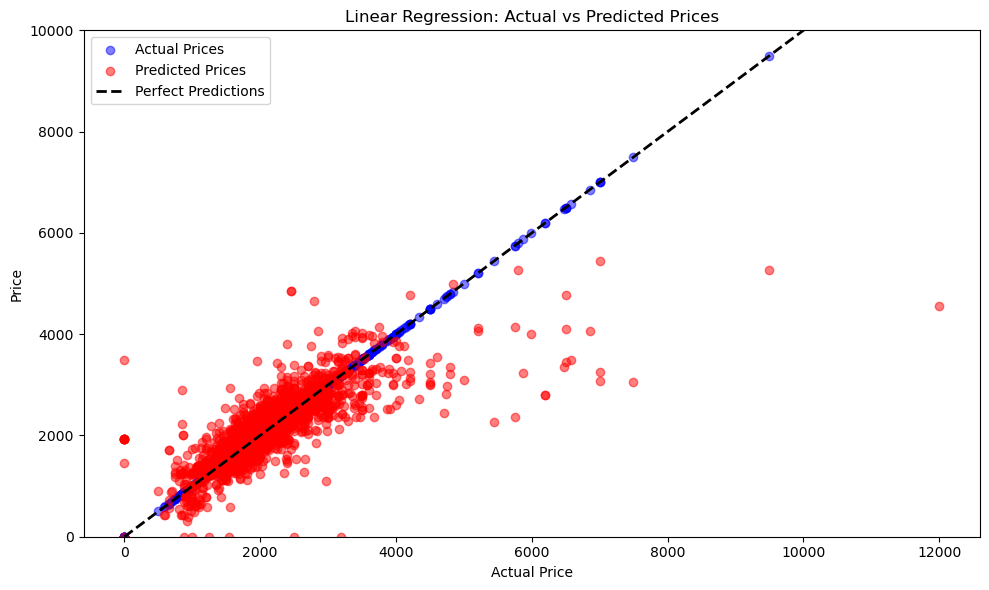

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with actual prices in blue
scatter_actual = ax.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Prices')

# Scatter plot with predicted prices in red
scatter_pred = ax.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted Prices')

# Perfect prediction line
ideal_line = ax.plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'k--', lw=2,
                     label='Perfect Predictions')

# Set axis limits and labels
ax.set_ylim(0, 10000)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Price')
ax.set_title('Linear Regression: Actual vs Predicted Prices')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

The plot above shows the model works well for the properties in the middle range, but performs poorly for the properties with very high or very low prices.

To better understand the relationship between the features and the target, we created scatter plots for numerical features and box plots for one of the categorical features.

/var/folders/28/85gl2bgj5wg25k0h_j12kkk40000gn/T/ipykernel_34166/178523504.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
/var/folders/28/85gl2bgj5wg25k0h_j12kkk40000gn/T/ipykernel_34166/178523504.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')


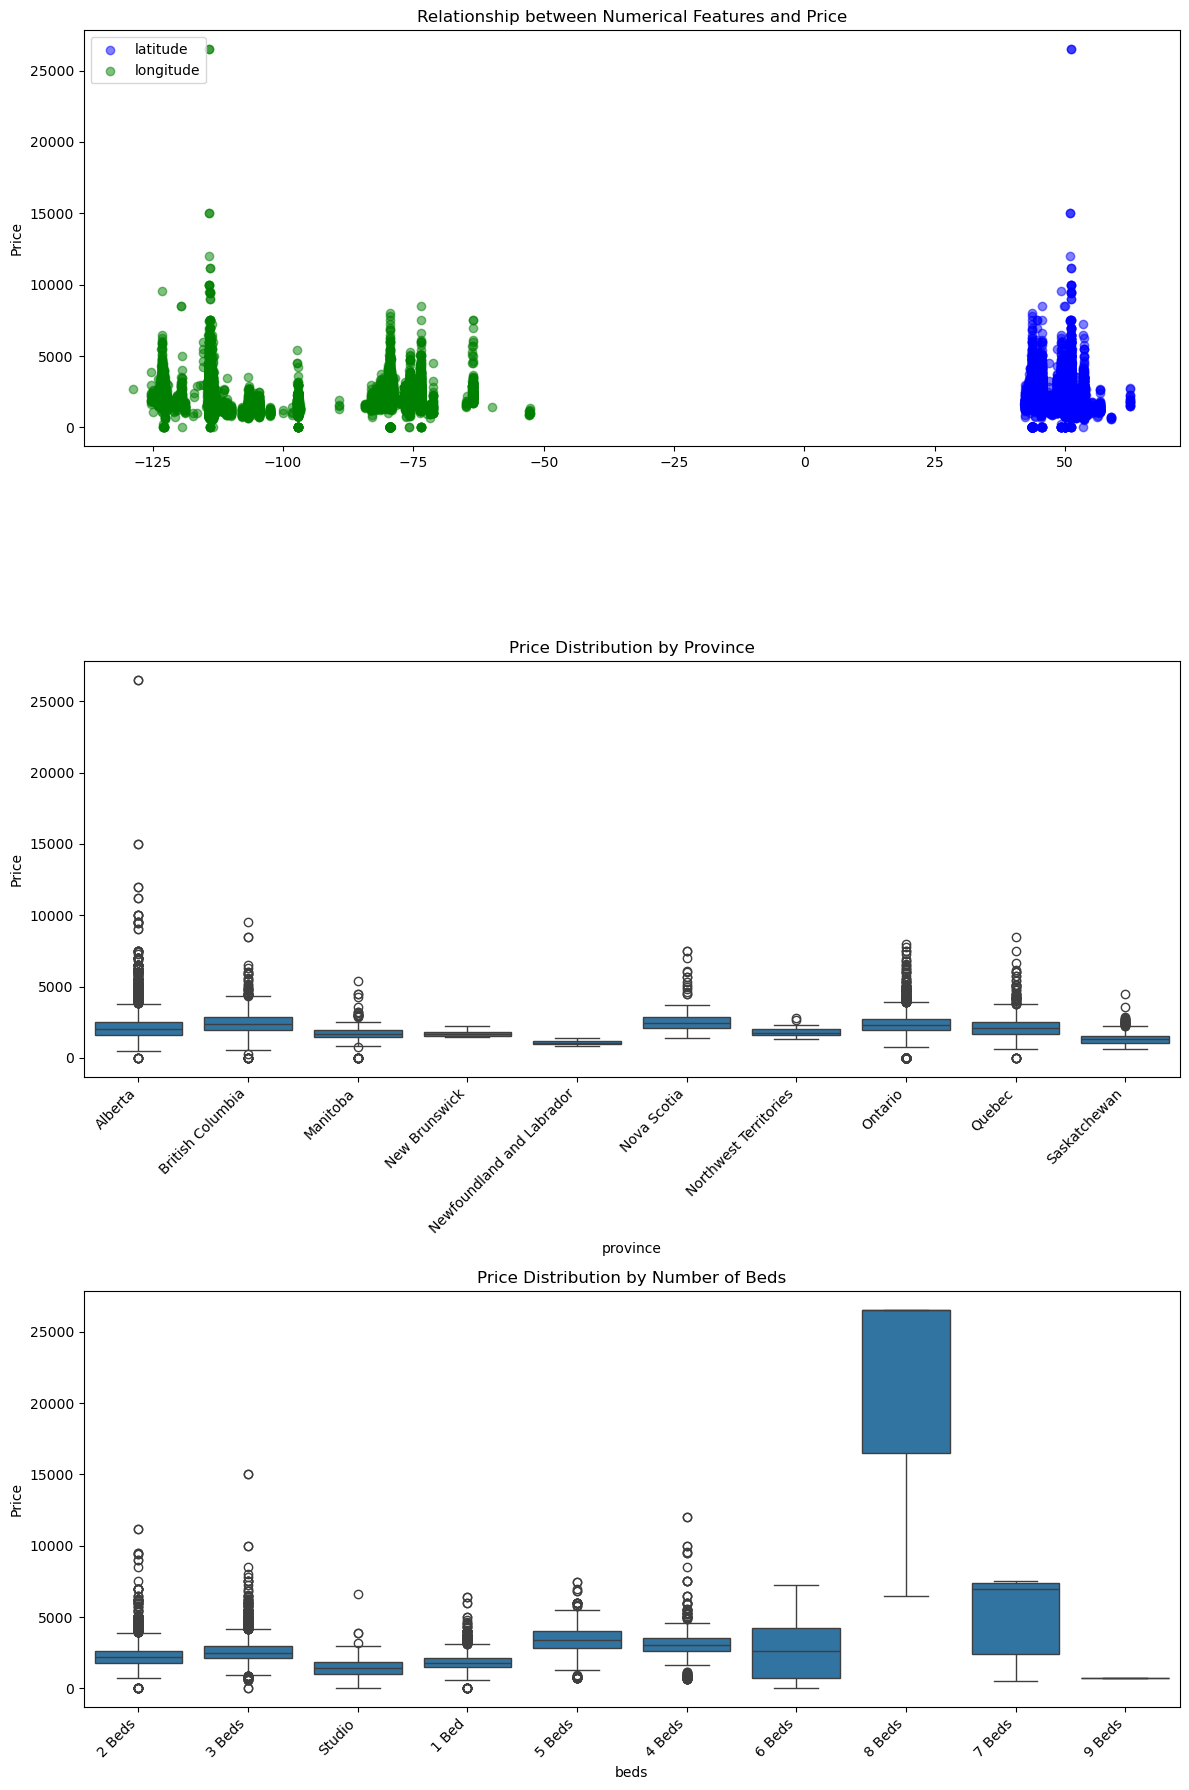

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# 1. Scatter plots for numerical features (latitude and longitude)
numerical_features = ['latitude', 'longitude']
colors = ['blue', 'green']
for feature, color in zip(numerical_features, colors):
    ax1.scatter(X_train[feature], y_train, alpha=0.5, color=color, label=feature)

ax1.set_ylabel('Price')
ax1.set_title('Relationship between Numerical Features and Price')
ax1.legend()

# 2. Box plots for categorical features (using one important categorical feature as example)
sns.boxplot(data=df, x='province', y='price', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Price Distribution by Province')
ax2.set_ylabel('Price')

# 3. Box plot for 'beds' vs 'price'
sns.boxplot(data=df, x='beds', y='price', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_title('Price Distribution by Number of Beds')
ax3.set_ylabel('Price')

plt.tight_layout()
plt.show()

Look at plot 1, there is no linear pattern between the latitude and longitude of the properties and the price.

Look at plot 2, the price from different provinces have overlapping ranges.

These help to explain why the linear regression model performs poorly.


#### 2. Random Forest Regression

We tried to use random forest regression, which is a non-linear model, to see if it performs better.

In [16]:
# TO DO: Create a pipeline with the ColumnTransformer and a linear regression model
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(ct, RandomForestRegressor())

# TO DO: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# TO DO: Make predictions on the test data  
y_pred = pipe.predict(X_test)

# calculate R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))




0.8768966957735395


The R2 score is 0.88, which is much better than the linear regression model.

We made a scatter plot to visualize the relationship between the actual prices and the predicted prices again.

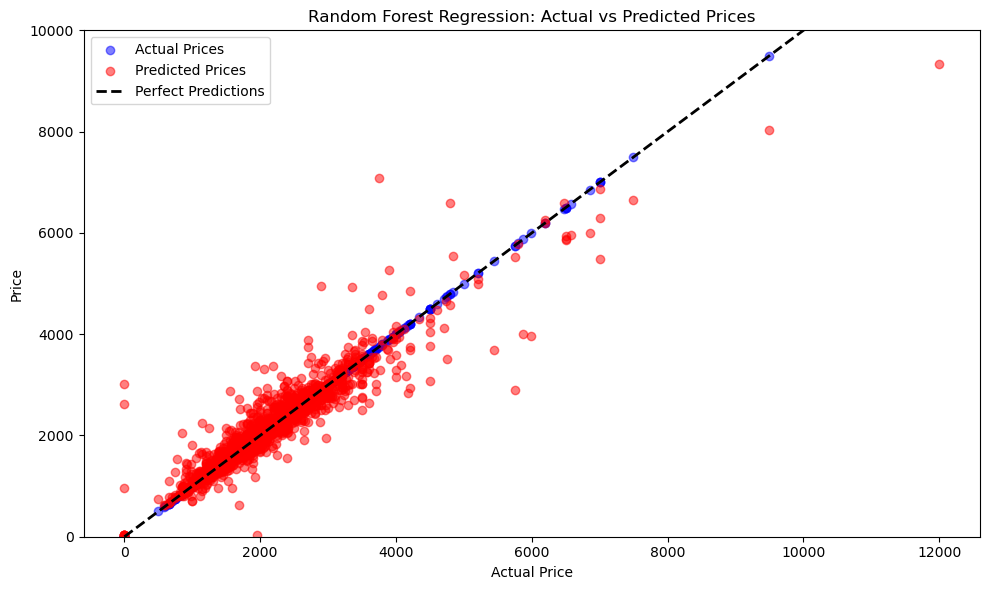

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with actual prices in blue
scatter_actual = ax.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Prices')

# Scatter plot with predicted prices in red
scatter_pred = ax.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted Prices')

# Perfect prediction line
ideal_line = ax.plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'k--', lw=2,
                     label='Perfect Predictions')

# Set axis limits and labels
ax.set_ylim(0, 10000)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Price')
ax.set_title('Random Forest Regression: Actual vs Predicted Prices')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

The result from the random forest regression model is much better than the linear regression model.

We will add cross validation and hyperparameter tunning to the random forest regression model to see if the performance can be improved.


In [18]:
# We only put 2 parameters in the grid search because it takes very long time to run.
# Each candidate takes about 25 seconds to run.

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Create pipeline
pipe = make_pipeline(ct, RandomForestRegressor())

# Define parameter grid for RandomForestRegressor
param_grid = {
    'randomforestregressor__max_depth': [100, 1000],
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Make predictions with best model
y_pred = grid_search.predict(X_test)

# Calculate R2 score on test set
test_score = r2_score(y_test, y_pred)
print("Test set R2 score:", test_score)

# Add the result to the dataframe
results_list.append({'Model': 'Random Forest Regression',
                      'Validation Score': grid_search.best_score_,
                      'R2 Score': r2_score(y_test, y_pred)})


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'randomforestregressor__max_depth': 100}
Best cross-validation score: 0.8299156548534704
Test set R2 score: 0.876908722771246


The R2 score went slightly higher to 0.884.

#### 3. K-NN Regression

From now on, we will strictly follow Hyperparameter Tuning -> Implement Model -> Validate Model -> Visualize Model Performance.


In [19]:
# We only put 2 parameters in the grid search because it takes very long time to run.
# Each candidate takes about 25 seconds to run.

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Create pipeline
pipe = make_pipeline(ct, KNeighborsRegressor())

# Define parameter grid for KNeighborsRegressor
param_grid = {
    'kneighborsregressor__n_neighbors': [5, 10, 15],  # number of neighbors
    'kneighborsregressor__weights': ['uniform', 'distance']  # weight function used
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Make predictions with best model
y_pred = grid_search.predict(X_test)

# Calculate R2 score on test set
test_score = r2_score(y_test, y_pred)
print("Test set R2 score:", test_score)

# Add the result to the dataframe
results_list.append({'Model': 'K-NN Regression',
                      'Validation Score': grid_search.best_score_,
                      'R2 Score': r2_score(y_test, y_pred)})


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.8309465749206554
Test set R2 score: 0.8776398224924191


Visualize the performance of the K-NN regression model.

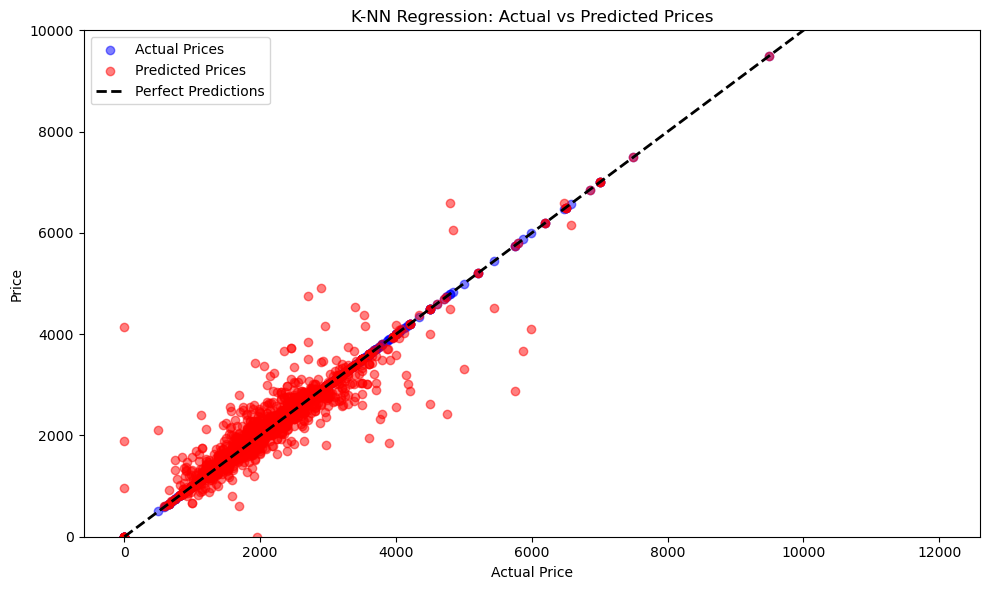

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with actual prices in blue
scatter_actual = ax.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Prices')

# Scatter plot with predicted prices in red
scatter_pred = ax.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted Prices')

# Perfect prediction line
ideal_line = ax.plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'k--', lw=2,
                     label='Perfect Predictions')

# Set axis limits and labels
ax.set_ylim(0, 10000)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Price')
ax.set_title('K-NN Regression: Actual vs Predicted Prices')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

#### 4. Gradient Boosted Regression Tree

The linear regression model performs very poor, we don't want to count it as 1 of the 3 models. We added Gradient Boosted Regression Tree.

The original plan was to use MLP but we kept getting ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet, so we gave up.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Create pipeline
pipe = make_pipeline(ct, GradientBoostingRegressor())

# Define parameter grid for GradientBoostingRegressor
param_grid = {
    'gradientboostingregressor__learning_rate': [0.5, 0.8, 1]  # learning rate
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Make predictions with best model
y_pred = grid_search.predict(X_test)

# Calculate R2 score on test set
test_score = r2_score(y_test, y_pred)
print("Test set R2 score:", test_score)

# Add the result to the dataframe
results_list.append({'Model': 'Gradient Boosted Regression Tree',
                      'Validation Score': grid_search.best_score_,
                      'R2 Score': r2_score(y_test, y_pred)})


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'gradientboostingregressor__learning_rate': 0.8}
Best cross-validation score: 0.7600694809176531
Test set R2 score: 0.7710781858406988


The result is not as good as KNN or Random Forest Regression.

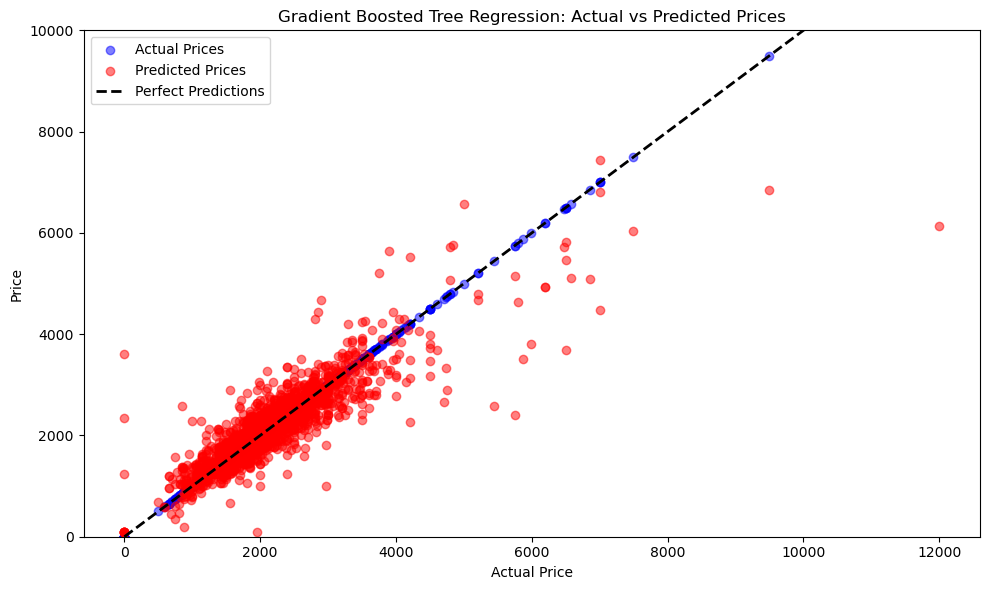

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with actual prices in blue
scatter_actual = ax.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Prices')

# Scatter plot with predicted prices in red
scatter_pred = ax.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted Prices')

# Perfect prediction line
ideal_line = ax.plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'k--', lw=2,
                     label='Perfect Predictions')

# Set axis limits and labels
ax.set_ylim(0, 10000)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Price')
ax.set_title('Gradient Boosted Tree Regression: Actual vs Predicted Prices')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

### Conclusion

In [23]:
# Print out the results
# Format R2 Score to 4 decimal places
results_df = pd.DataFrame(results_list)
results_df['R2 Score'] = results_df['R2 Score'].apply(lambda x: f"{x:.4f}")
results_df

,Model,Validation Score,R2 Score
0,Linear Regression (Non-negative),NA,0.6013
1,Random Forest Regression,0.829916,0.8769
2,K-NN Regression,0.830947,0.8776
3,Gradient Boosted Regression Tree,0.760069,0.7711


Linear Regression is not a good choice for our problem.

Random Forest Regression and K-NN Regression are both good models.

We recommend to use K-NN Regression for this problem. It performs better than Random Forest Regression and trains much faster.


The code to create scatter plot is modifed from code generated by ChatGPT with prompt: "Help me create a scatter plot to compare actual prices and predicted prices."
